<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Examine the data structure

# Display summary information of the dataset 
print(df.info())

# Display column names
print("Column names:")
print(df.columns.to_list())

# Display data types
print("\nData types:")
print(df.dtypes)

# Display summary statistics (descriptive information)
print("\nSummary statistics:")
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
Column names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired'

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values in 'YearsCode' and 'YearsCodePro'
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Handle missing values in 'Age'
age_mapping = {'Under 18 years old': 16, '18-24 years old': 21, '25-34 years old': 30, '35-44 years old': 40, '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70, 'Prefer not to say': None}
df['Age'] = df['Age'].map(age_mapping)

# Impute missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())  # Avoid chained assignment

# Handle missing values in 'ConvertedCompYearly' by imputing with 0
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(0)  # Avoid chained assignment

# Handle missing values in 'JobSat' by dropping rows
df.dropna(subset=['JobSat'], inplace=True)

# Verify that missing values have been handled in selected columns
print("\nMissing values after handling:")
print(df[['YearsCode', 'YearsCodePro', 'Age', 'ConvertedCompYearly', 'JobSat']].isnull().sum())

Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing values after handling:
YearsCode               162
YearsCodePro           1558
Age                       0
ConvertedCompYearly       0
JobSat                    0
dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here
# Value counts for 'Employment'
print("Value counts for Employment:")
print(df['Employment'].value_counts())

# Value counts for 'JobSat'
print("\nValue counts for JobSat:")
print(df['JobSat'].value_counts())

# Value counts for 'YearsCodePro'
print("\nValue counts for YearsCodePro:")
print(df['YearsCodePro'].value_counts())

Value counts for Employment:
Employment
Employed, full-time                                                                                                                    22537
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                2291
Independent contractor, freelancer, or self-employed                                                                                    1245
Employed, part-time                                                                                                                      534
Employed, full-time;Student, part-time                                                                                                   509
                                                                                                                                       ...  
Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Em

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


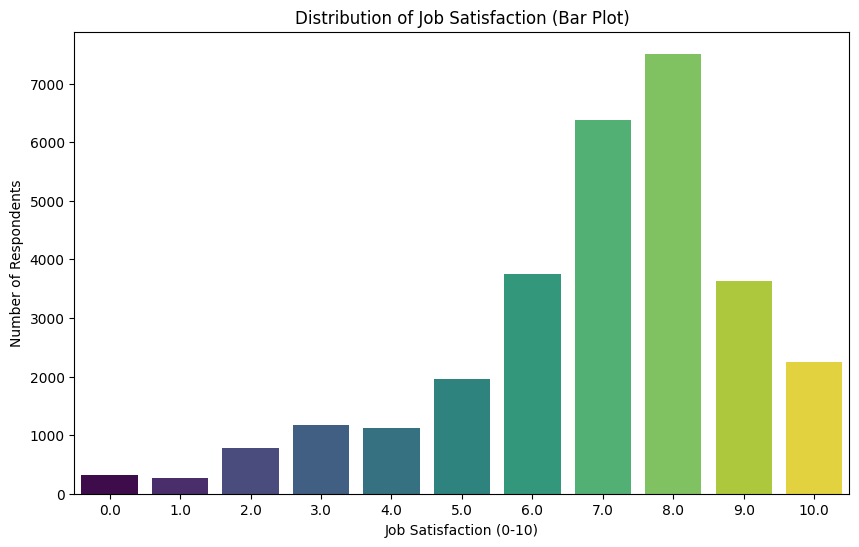

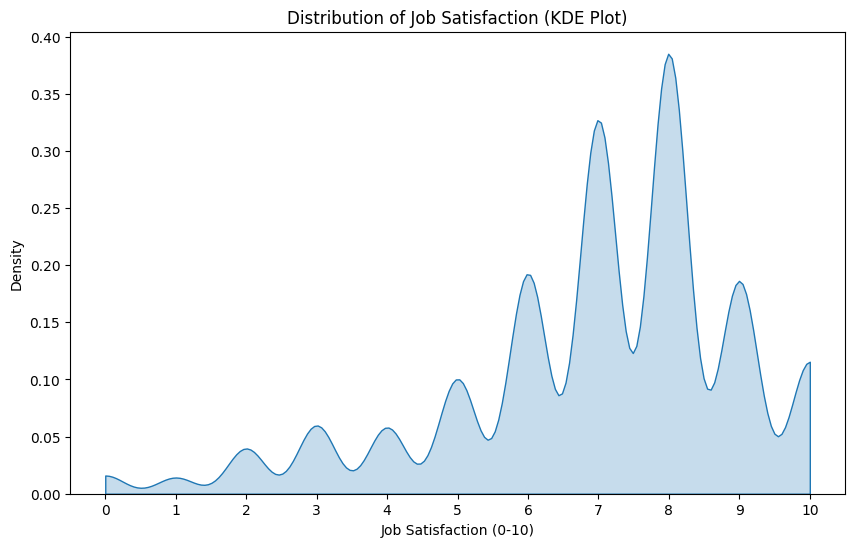

    JobSat  Percentage
0      0.0    1.067774
1      1.0    0.947607
2      2.0    2.650553
3      3.0    3.999863
4      4.0    3.879695
5      5.0    6.715649
6      6.0   12.878528
7      7.0   21.901394
8      8.0   25.781089
9      9.0   12.449358
10    10.0    7.728490


In [7]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a bar plot (using 'hue' parameter for clarity)
job_sat_counts = df['JobSat'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=job_sat_counts.index, y=job_sat_counts.values, hue=job_sat_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Job Satisfaction (Bar Plot)')
plt.xlabel('Job Satisfaction (0-10)')
plt.ylabel('Number of Respondents')
plt.xticks(range(0, 11))
plt.show()

# Create a KDE plot (still useful for visualizing the distribution's shape)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], fill=True, clip=(0,10))
plt.title('Distribution of Job Satisfaction (KDE Plot)')
plt.xlabel('Job Satisfaction (0-10)')
plt.ylabel('Density')
plt.xticks(range(0, 11))
plt.show()

#Create a dataframe with the percentage for each JobSat value
job_sat_percentage = (df['JobSat'].value_counts(normalize=True)*100).sort_index()
df_job_sat = pd.DataFrame({'JobSat':job_sat_percentage.index, 'Percentage':job_sat_percentage.values})
print(df_job_sat)

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


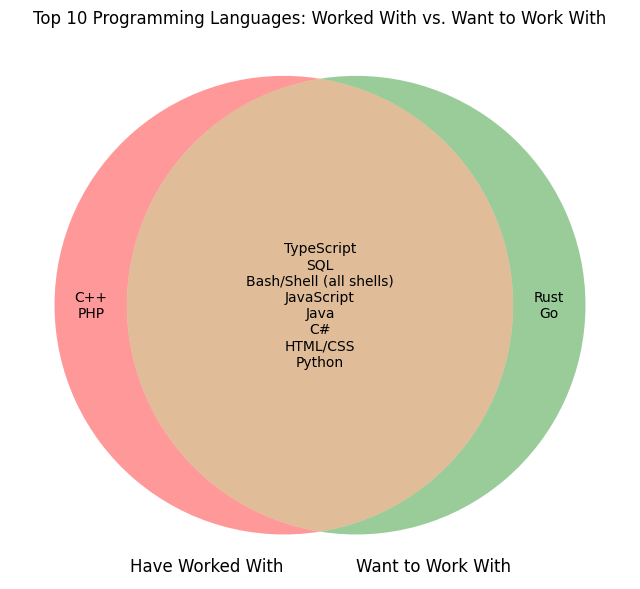

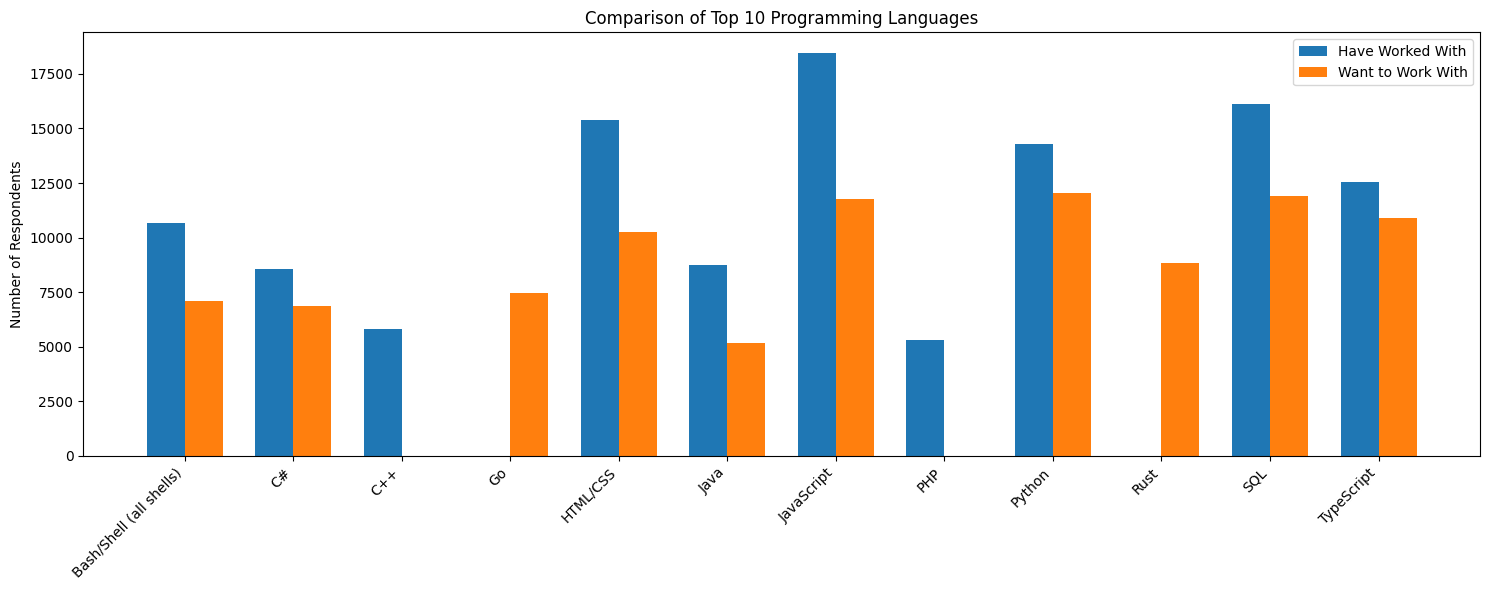

In [12]:
## Write your code here
!pip install matplotlib-venn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from collections import Counter

# Handle missing values and split the languages
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].fillna('')

have_worked = [lang.strip() for langs in df['LanguageHaveWorkedWith'].str.split(';') for lang in langs if lang.strip()]
want_to_work = [lang.strip() for langs in df['LanguageWantToWorkWith'].str.split(';') for lang in langs if lang.strip()]

# Count language occurrences
have_worked_counts = Counter(have_worked)
want_to_work_counts = Counter(want_to_work)

# Get top 10 languages for each
top_n = 10
top_have_worked = dict(have_worked_counts.most_common(top_n))
top_want_to_work = dict(want_to_work_counts.most_common(top_n))

# Venn Diagram (for set comparison)
plt.figure(figsize=(8, 8))
venn = venn2([set(top_have_worked), set(top_want_to_work)], set_labels=('Have Worked With', 'Want to Work With'))
venn.get_label_by_id('100').set_text('\n'.join(set(top_have_worked) - set(top_want_to_work)))
venn.get_label_by_id('010').set_text('\n'.join(set(top_want_to_work) - set(top_have_worked)))
venn.get_label_by_id('110').set_text('\n'.join(set(top_have_worked) & set(top_want_to_work)))
plt.title(f'Top {top_n} Programming Languages: Worked With vs. Want to Work With')
plt.show()

# Grouped Bar Chart (for count comparison)
languages = sorted(set(top_have_worked) | set(top_want_to_work))
have_counts = [top_have_worked.get(lang, 0) for lang in languages]
want_counts = [top_want_to_work.get(lang, 0) for lang in languages]

x = range(len(languages))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar([i - width/2 for i in x], have_counts, width, label='Have Worked With')
rects2 = ax.bar([i + width/2 for i in x], want_counts, width, label='Want to Work With')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Respondents')
ax.set_title(f'Comparison of Top {top_n} Programming Languages')
ax.set_xticks(x)
ax.set_xticklabels(languages, rotation=45, ha='right')
ax.legend()
fig.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


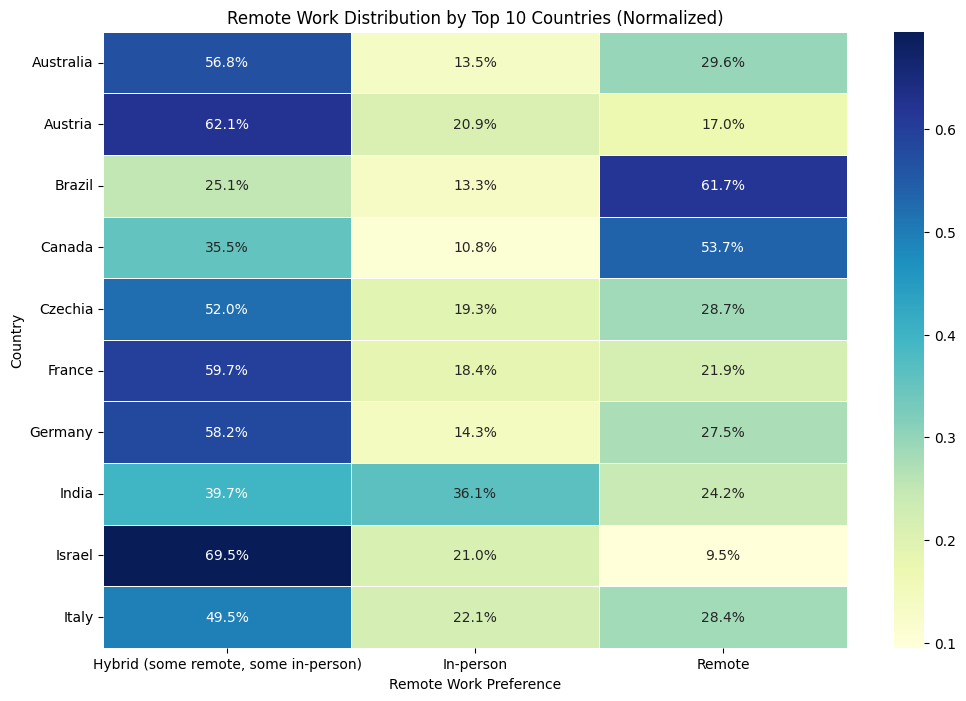

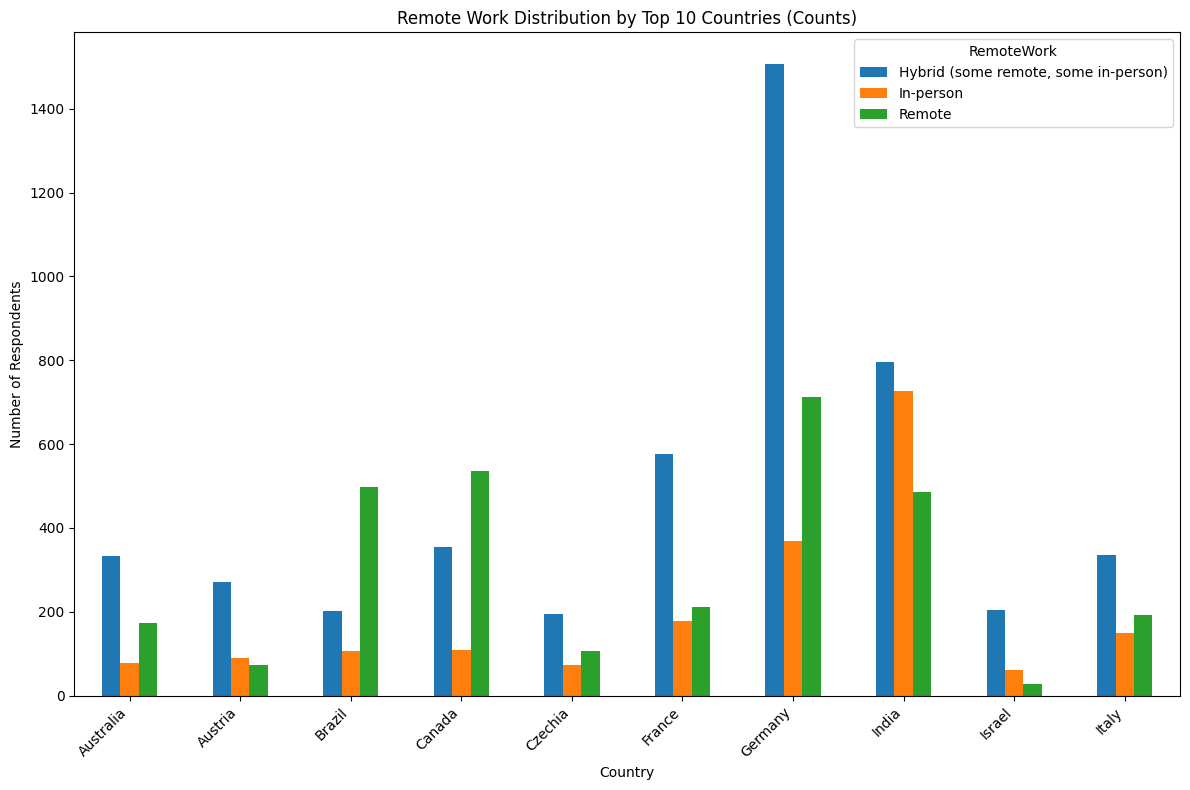

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simplify the Country names for better readability on the plot
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Germany': 'Germany',
    'Canada': 'Canada',
    'India': 'India',
    'France': 'France',
    'Brazil': 'Brazil',
    'Netherlands': 'Netherlands',
    'Australia': 'Australia',
    'Spain': 'Spain',
    'Sweden': 'Sweden',
    'Poland': 'Poland',
    'Italy': 'Italy',
    'Switzerland': 'Switzerland',
    'Russian Federation': 'Russia',
    'Austria': 'Austria',
    'Israel': 'Israel',
    'Turkey': 'Turkey',
    'Czech Republic': 'Czechia',
    'Ukraine': 'Ukraine'
}
df['Country_Simplified'] = df['Country'].map(country_mapping).fillna('Other')

#Create a crosstab between Country and RemoteWork
remote_work_by_country = pd.crosstab(df['Country_Simplified'], df['RemoteWork'])

# Normalize the cross-tabulation to show percentages within each Country
remote_work_by_country_normalized = remote_work_by_country.div(remote_work_by_country.sum(axis=1), axis=0)

# Select top N countries for visualization
top_n = 10
top_countries = remote_work_by_country_normalized.sum(axis=1).nlargest(top_n).index
remote_work_by_country_normalized_top = remote_work_by_country_normalized.loc[top_countries]

# Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(remote_work_by_country_normalized_top, annot=True, cmap="YlGnBu", fmt=".1%", linewidths=.5)
plt.title(f'Remote Work Distribution by Top {top_n} Countries (Normalized)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Country')
plt.yticks(rotation=0)
plt.show()

#Grouped Bar Chart Visualization
remote_work_by_country_top = remote_work_by_country.loc[top_countries]
remote_work_by_country_top.plot(kind='bar', figsize=(12, 8))
plt.title(f'Remote Work Distribution by Top {top_n} Countries (Counts)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [14]:
# Calculate Pearson correlation coefficient
pearson_corr = df['JobSat'].corr(df['YearsCodePro'])
print(f"Pearson correlation between JobSat and YearsCodePro: {pearson_corr:.3f}")

# Calculate Spearman correlation coefficient
spearman_corr = df['JobSat'].corr(df['YearsCodePro'], method='spearman')
print(f"Spearman correlation between JobSat and YearsCodePro: {spearman_corr:.3f}")


Pearson correlation between JobSat and YearsCodePro: 0.102
Spearman correlation between JobSat and YearsCodePro: 0.117


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                 674   
Employed, full-time;Employed, part-time                                               7   
Employed, full-time;Independent contractor, fre...                                   75   
Employed, full-time;Independent contractor, fre...                                    7   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Independent contractor, free...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   

/tmp/ipykernel_2080/3796306941.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


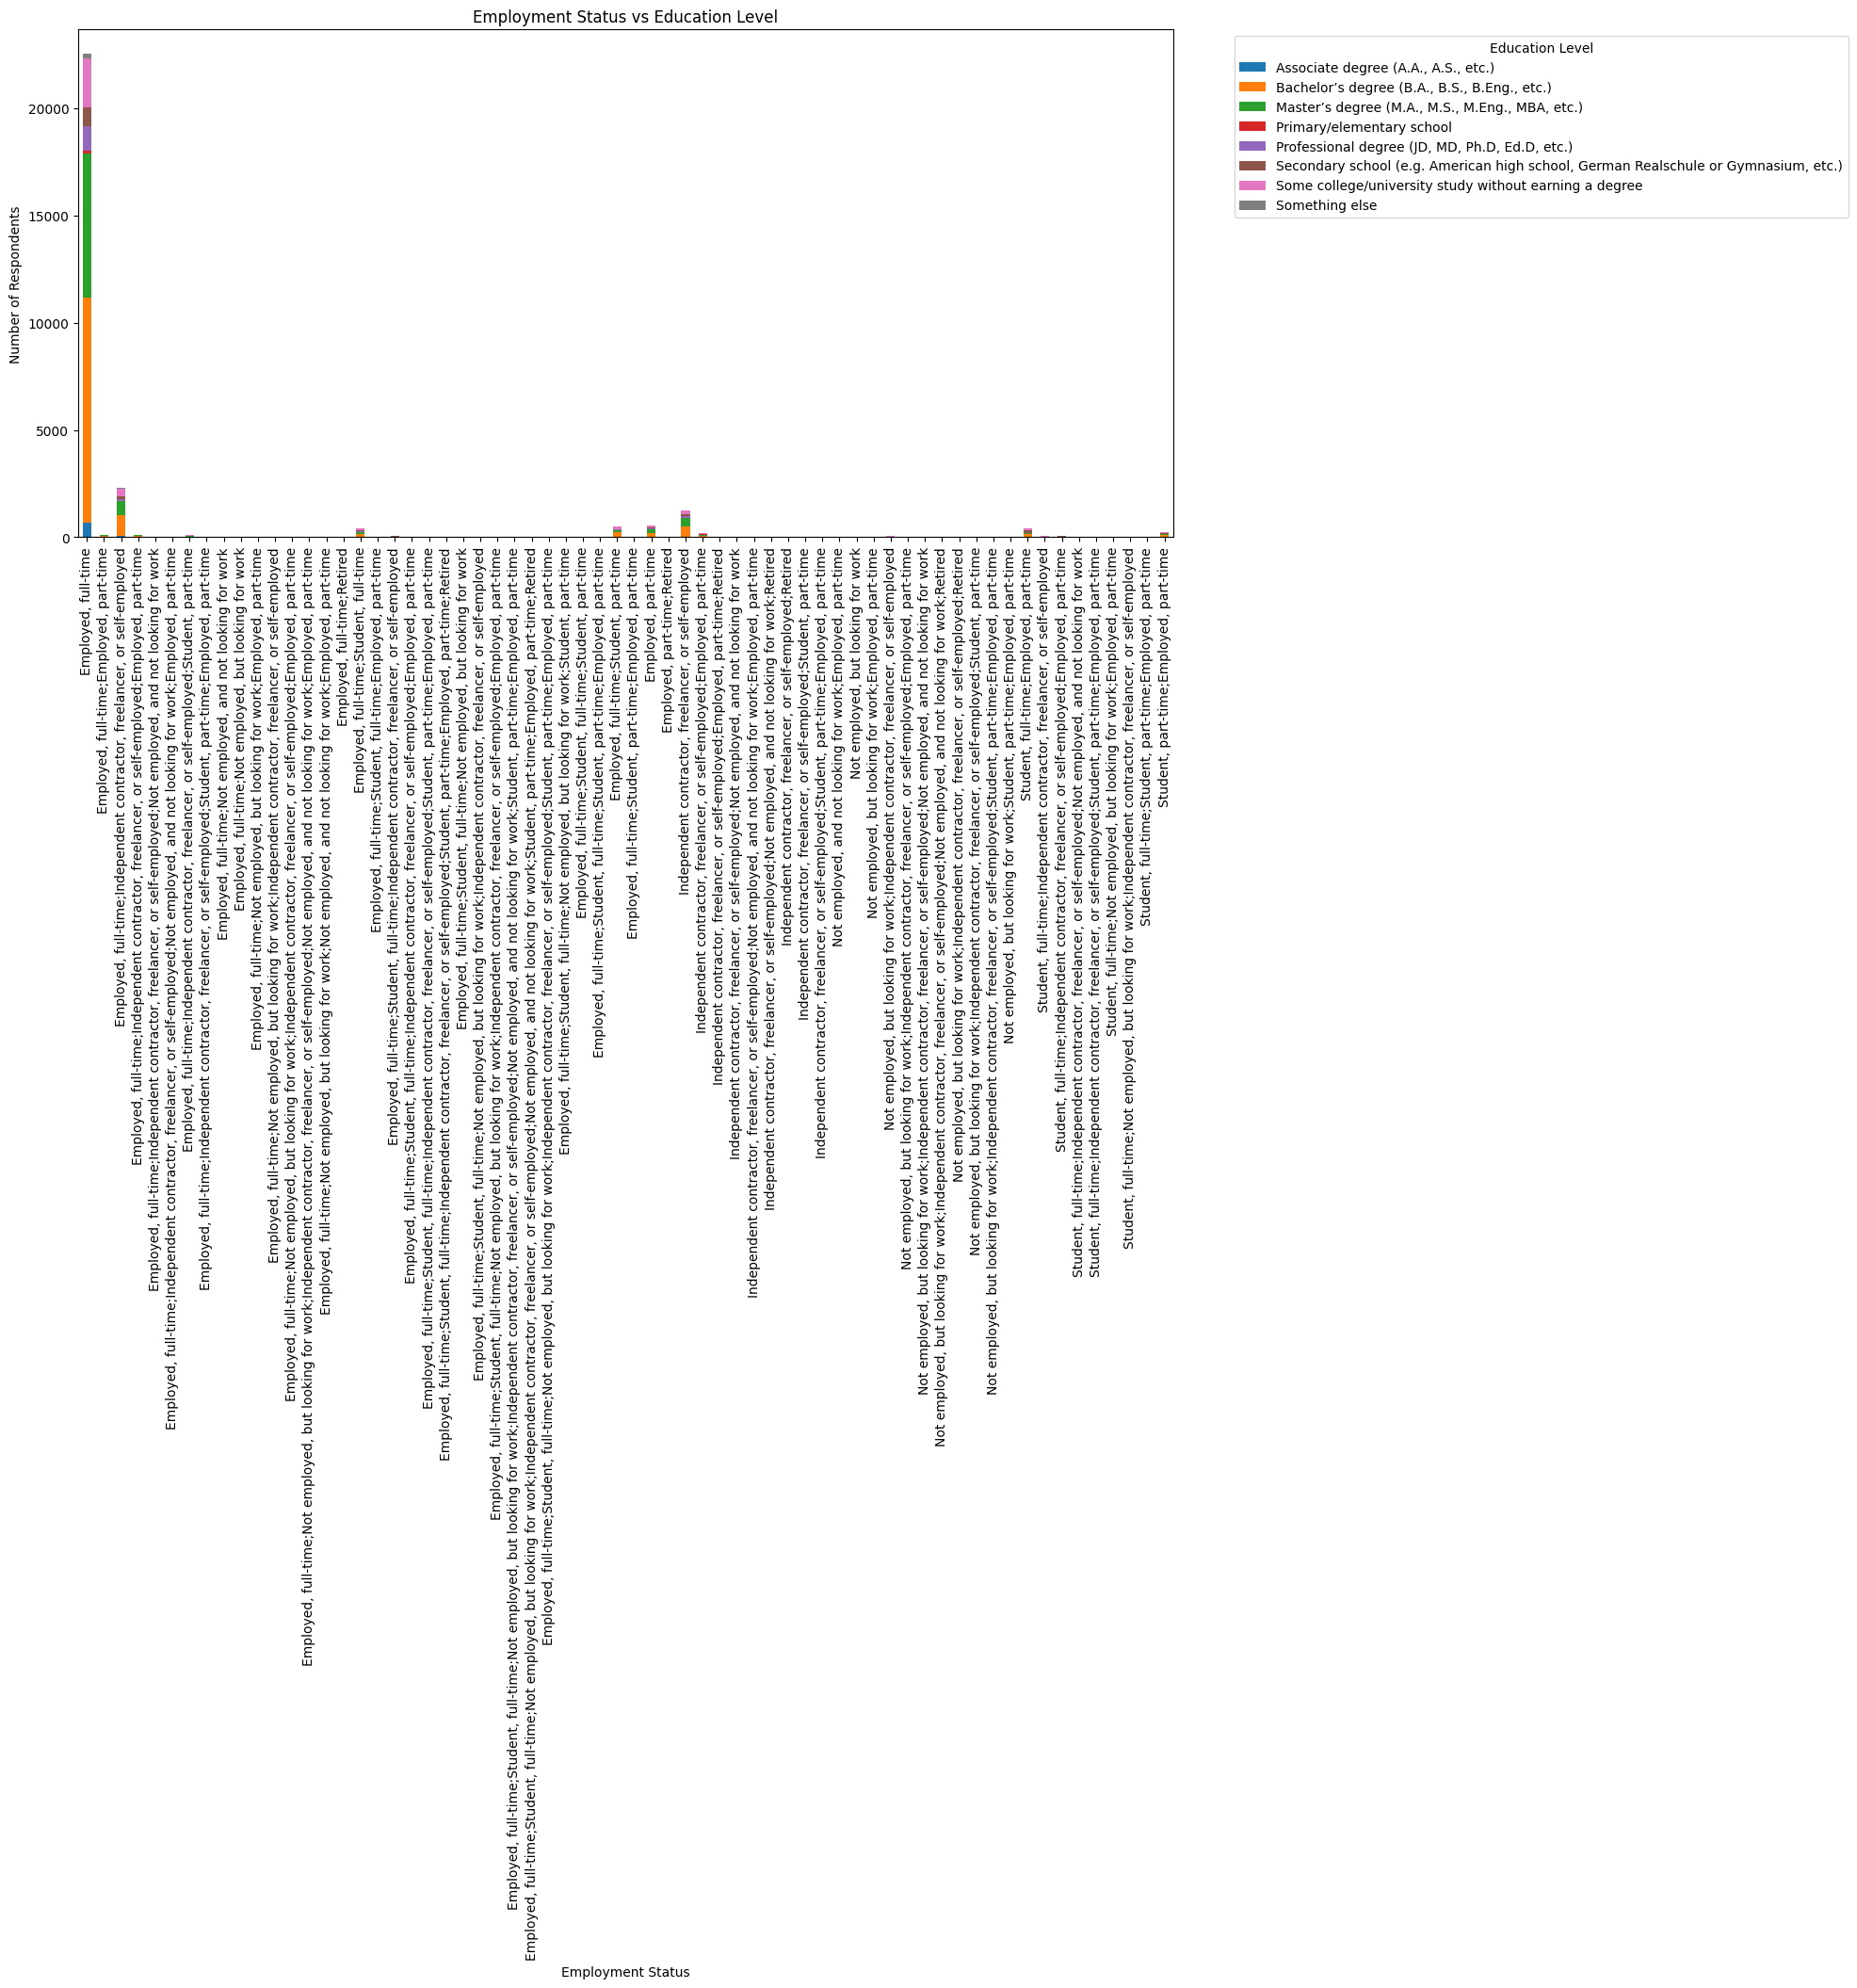

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create cross-tabulation table
crosstab = pd.crosstab(df['Employment'], df['EdLevel'])

# Display the crosstab table
print(crosstab)

# Plot the cross-tabulation as a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title('Employment Status vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
